In [1]:
import matplotlib.pyplot as plt
import os
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def funkcje(numer):
    match numer:
        case 1:
            return "5 * X1**3 - 2 * X1**2 + 3 * X1 - 17"
        case 2:
            return "math.sin(X1) + math.cos(X1)"
        case 3:
            return "2 * math.log(X1 + 1)"
        case 4:
            return "X1 + 2 * X2"
        case 5:
            return "math.sin(X1 / 2) + 2 * math.cos(X1)"
        case 6:
            return "X1**2 + 3 * X1 * X2 - 7 * X2 + 1"
        case _:
            return ""
        
def wyznaczenie_numeru_funkcji(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-4][-1]

def wyznaczenie_numeru_dziedziny(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    return tabela[-3][-1]

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wyznaczanie_kroku_funkcji(numer_funkcji, numer_dziedziny):
    match numer_funkcji:
        case 4:
            if numer_dziedziny == 3:
                return 1
            if numer_dziedziny == 4:
                return 10
        case 5:
            if numer_dziedziny>2:
                return 1
        case 6:
            if numer_dziedziny == 2:
                return 1
            if numer_dziedziny == 4:
                return 10
    
    return 0.1

In [3]:
def plotowanie_jednoargumentowe(p, k, funkcja, nr_funkcji):
    x_axis = []
    y_axis = []
    y_original = []
    # krok = 0.1
    krok = 0.03
    i = int(p)
    koniec = int(k)
    funkcja_original = funkcje(nr_funkcji)
    # evaluacja funkcji do tablic
    while i < koniec:
        sin = math.sin
        cos = math.cos
        X1 = i
        if i == 0:  #zeby nie bylo dzielenia czasem przez 0
            i+=krok
            continue
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        y_original.append(eval(funkcja_original))
        x_axis.append(i)
        i += krok

    return x_axis, y_axis, y_original

def wypisz_funkcje_jednoargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()

    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        x, y_gp, y_original = plotowanie_jednoargumentowe(poczatek, koniec, zawartosc, nr_funkcji)

        plt.grid(True)
        plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
        plt.scatter(x, y_original, color='orange', label='Proper', s=10)
        plt.xlabel('Oś X')
        plt.ylabel('Oś Y')
        plt.legend()
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()

        return os.path.join(sciezka_docelowa, nazwa_obrazka)

def plotowanie_dwuargumentowe(p, k, funkcja, nr_funkcji, nr_dziedziny):
    y_axis = []
    y_original = []
    x1_axis = []
    x2_axis = []
    krok = wyznaczanie_kroku_funkcji(nr_funkcji, nr_dziedziny)
    funkcja_original = funkcje(nr_funkcji)
    i = int(p)
    koniec = int(k)
    
    while i < koniec:
        j = int(p)
        X1 = i
        if i == 0: #zeby nie bylo dzielenia czasem przez 0
            X1 = 0.001
        while j < koniec:
            X2 = j
            if j == 0:
                X2 = 0.001
            y_axis.append(eval(funkcja))
            y_original.append(eval(funkcja_original))
            x1_axis.append(i)
            x2_axis.append(j)
            j += krok
        i += krok
    
    return x1_axis, x2_axis, y_axis, y_original

def wypisz_funkcje_dwuargumentowa(nazwa_pliku, sciezka_docelowa, nr_funkcji):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc) > 0:
        zawartosc = zawartosc.replace(")(", ") * (")    #obsluga bledow )( gdy nie ma znaku mnozenia pomiedzy
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        nr_dziedziny = int(wyznaczenie_numeru_dziedziny(nazwa_pliku))
        x1, x2, y, y_original = plotowanie_dwuargumentowe(poczatek, koniec, zawartosc, nr_funkcji, nr_dziedziny)
        size = 5
        fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

        ax[0].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[0].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)

        ax[0].set_xlabel('X1')
        ax[0].set_ylabel('X2')
        ax[0].set_zlabel('Y')
        ax[0].legend()

        ax[1].scatter(x1, x2, y, color='green', label='TinyGP', s=size)
        ax[1].scatter(x1, x2, y_original, color='orange', label='Proper', s=size)
        ax[1].view_init(elev=30, azim=45)
        ax[1].text2D(0.05, 0.95, "Rzut z boku", transform=ax[1].transAxes)

        ax[1].set_xlabel('X1')
        ax[1].set_ylabel('X2')
        ax[1].set_zlabel('Y')
        ax[1].legend()
        
        nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
        plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
        plt.show()
        
        return os.path.join(sciezka_docelowa, nazwa_obrazka)

In [4]:
def znajdz_pliki_done(folder, pattern):
    pliki_done = []
    folder_done = os.path.join(folder, "files", "done")
    folder_img = os.path.join(folder, "files", "img")
    
    for plik in os.listdir(folder_done):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"):
            pelna_sciezka = os.path.join(folder_done, plik)
            # print(pelna_sciezka)
            nr_funkcji = int(wyznaczenie_numeru_funkcji(pelna_sciezka))
            if nr_funkcji<4:
                nazwa = wypisz_funkcje_jednoargumentowa(pelna_sciezka, folder_img, nr_funkcji)
            else:
                nazwa = wypisz_funkcje_dwuargumentowa(pelna_sciezka, folder_img, nr_funkcji)
                
            # print(nazwa)
            
    return pliki_done

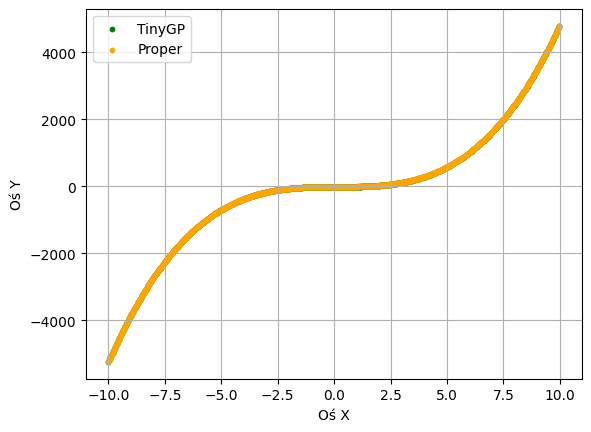

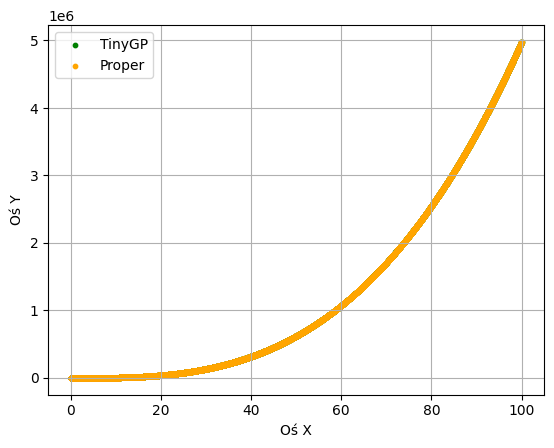

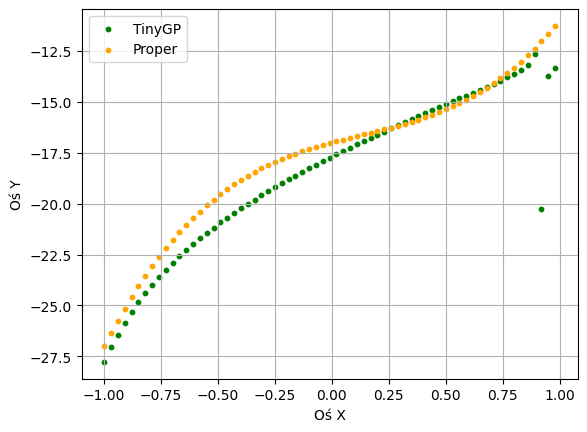

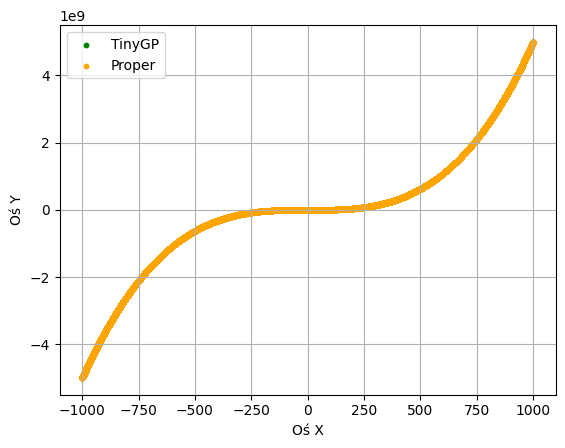

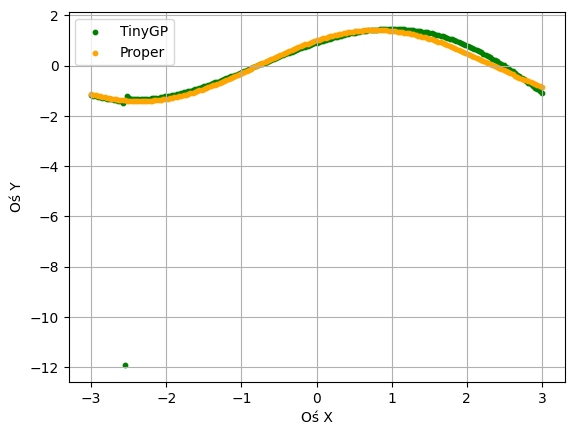

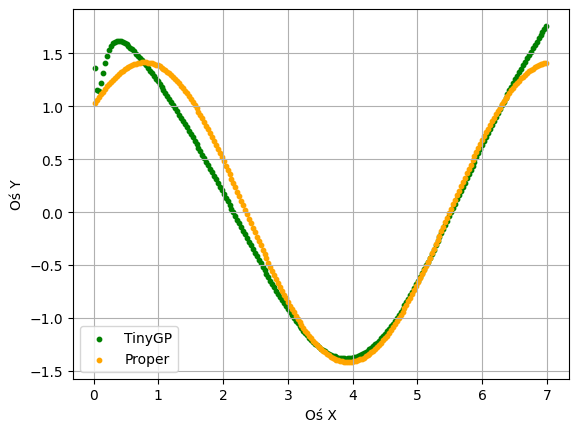

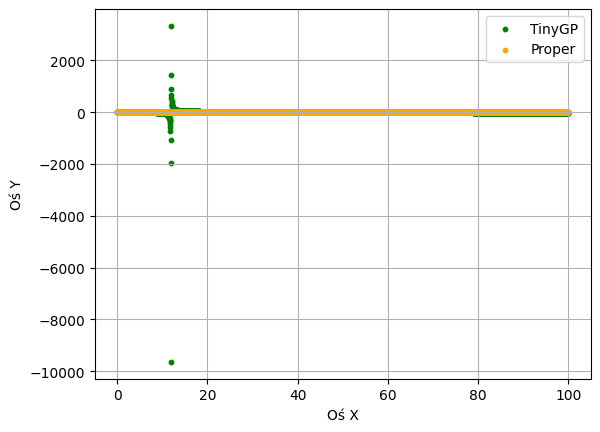

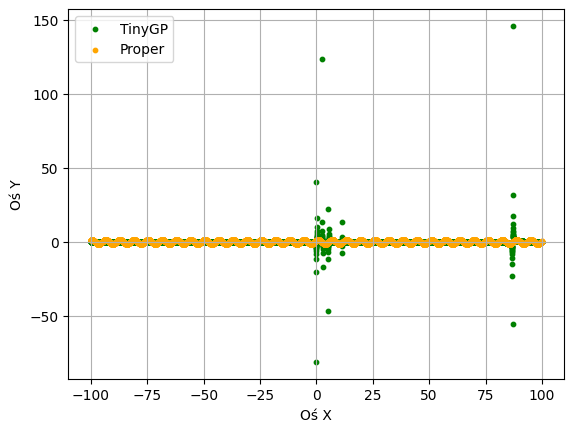

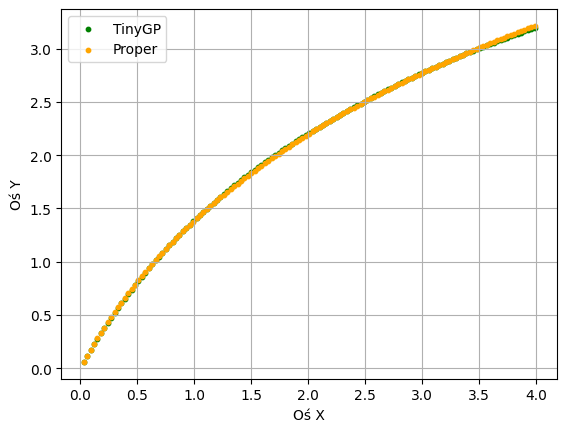

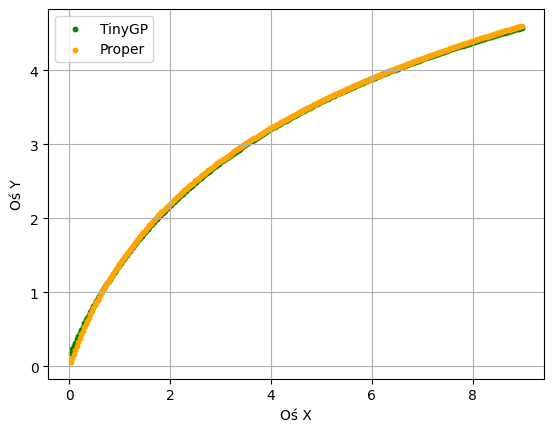

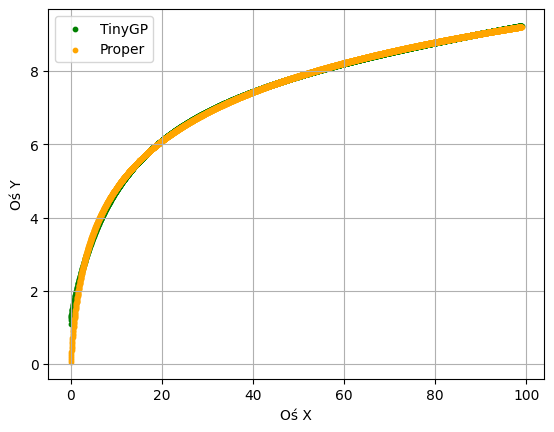

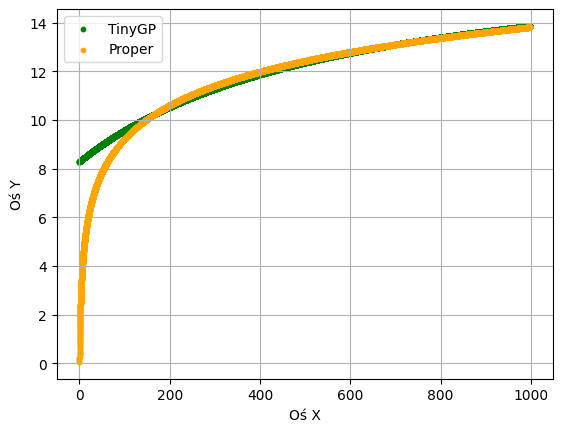

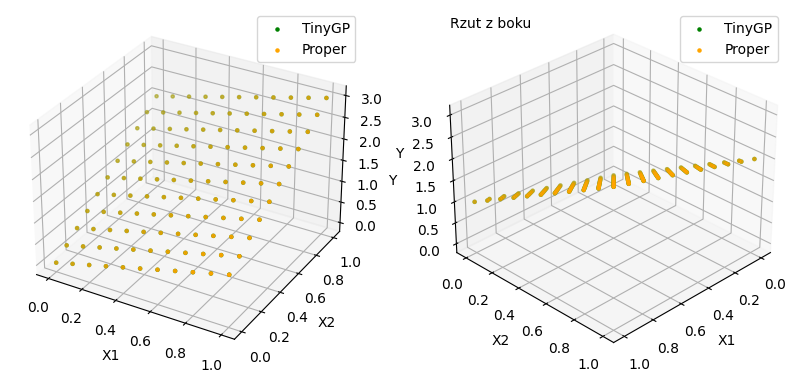

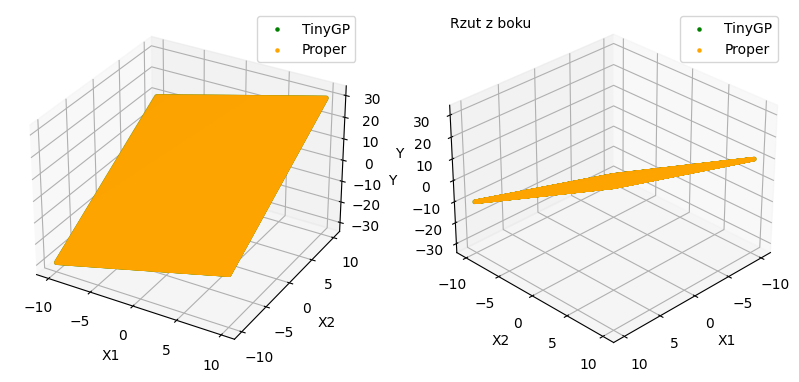

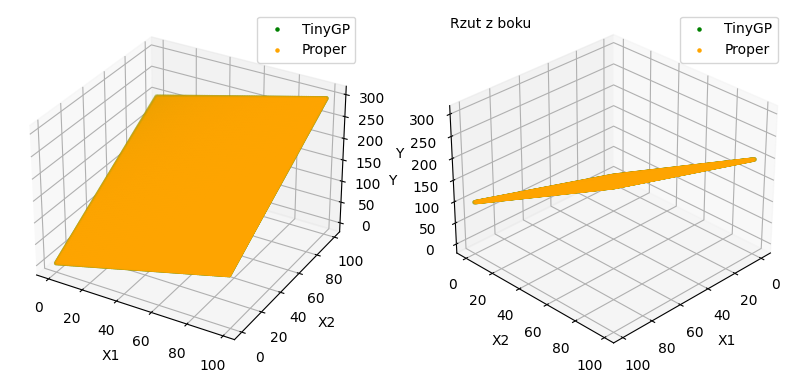

KeyboardInterrupt: 

In [5]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
pliki_done = znajdz_pliki_done(folder_glowny, "done zad1")

In [6]:
# x = "((X1 * cos ((X1  + (X1 * sin X1 )) - (3.0753746583620263 / 2.1505160546130666))) + (4.205075456405437 * cos (1.1998484260595044)))"
# x = "((X1 * sin( (X1 * cos( -0.006381789714943409)))) + (((-3.306893758042727 * sin( ((-2.658438231207861 * sin( -0.006381789714943409)) / (X1 * sin( (X1 * cos( (-3.149071034251137 * cos( 4.817852242024248))))))))) * sin( -0.5716652622879357)) * cos( (2.8932838741637026 / -0.18893569893329243))))"
x = "(((X1  * 1.9771752694714815) / 3.3035822606355385) - (((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + ((((((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (1.3364020260661977 * cos ((0.2999295342910626 * cos ((2.2826850992203473 + (((((-0.6227232922893213 + (-4.304998176579383 / -0.663228609008339)) + (((X1  * 1.3706607744708679) - (X1  * cos (1.9500055506343115))) + X1 )) * -2.411483585475117) - (1.3364020260661977 + 4.85813840841611)) / ((3.224310354409697 * sin (((X1  - (0.16312332401772434 / ((-3.0319791005964545 - (3.4966548609604526 * cos ((((2.2826850992203473 - (-3.900192527472627 / (0.2999295342910626 * 1.3706607744708679))) - ((-0.6227232922893213 / (3.4966548609604526 * sin ((0.38949410649180827 * ((0.6224732751244986 + X1 ) + (3.224310354409697 * sin ((-0.5926693302902954 / (-0.6485139204978001 * sin ((3.003041167148327 * -0.7850824467780679))))))))))) / (4.686021752087806 - ((3.224310354409697 * sin (((X1  - (0.16312332401772434 / (((0.38949410649180827 * 1.9500055506343115) / (0.8831458403961259 * cos ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((-0.29583179363411016 + (X1  * cos (4.568258996002491))) + 0.23444457787465822)))))))) - (1.9500055506343115 - -2.4759256226520843)))) * 2.2826850992203473))) * sin ((((4.686021752087806 + 4.42215335083622) + (((((((X1  - (0.16312332401772434 / ((-3.0319791005964545 / (4.264259784137913 * sin ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / (((4.686021752087806 + 4.42215335083622) + (((((((X1  - ((3.3035822606355385 * 3.98938572776823) / ((-3.0319791005964545 / (4.264259784137913 * sin ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (-4.572288007432652 * cos ((0.2999295342910626 * cos (0.34755002995084894)))))))))))))))) - (-2.8219750539663355 - -2.4759256226520843)))) / (-2.411483585475117 / -1.189799352124786)) * sin ((-0.6227232922893213 * cos (((-2.411483585475117 + (((2.7182605912634177 / ((3.380453826764157 / X1 ) * sin (((3.3035822606355385 / ((2.2826850992203473 - 4.85813840841611) / 0.10716331319169825)) - ((-0.6227232922893213 / (2.2826850992203473 + ((((((0.2999295342910626 / -2.262422979349984) + (-4.304998176579383 / -0.663228609008339)) + (((X1  * 1.3706607744708679) - (-0.6485139204978001 * cos (1.9500055506343115))) + X1 )) * -2.708246687530007) - (1.3364020260661977 + 4.85813840841611)) / ((3.224310354409697 * sin (((X1  - (0.16312332401772434 / ((-3.0319791005964545 - (3.4966548609604526 * cos ((((-2.8219750539663355 - -2.4759256226520843) - ((X1  / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * ((0.6224732751244986 + X1 ) + (3.224310354409697 * sin ((-0.5926693302902954 / (-0.6485139204978001 * sin ((3.003041167148327 * -0.7850824467780679))))))))))) / (4.686021752087806 - (0.16312332401772434 * sin ((((4.686021752087806 + 4.42215335083622) + (((((((X1  - ((3.3035822606355385 * 3.98938572776823) / ((-3.0319791005964545 / (4.264259784137913 * sin ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (-4.572288007432652 * cos ((0.2999295342910626 * cos (0.34755002995084894)))))))))))))))) - (-2.8219750539663355 - -2.4759256226520843)))) / (-2.411483585475117 / -1.189799352124786)) * sin ((-0.6227232922893213 * cos (((-2.411483585475117 + (((2.7182605912634177 / ((3.380453826764157 / X1 ) * sin (((3.3035822606355385 / ((2.2826850992203473 - 4.85813840841611) / -2.262422979349984)) - ((-0.6227232922893213 / (-0.6227232922893213 * sin ((0.38949410649180827 * (X1  + (((4.42215335083622 * -3.900192527472627) * (2.2826850992203473 * cos ((-4.7757294975900315 * cos (-4.085695152472081))))) * cos ((X1  * ((((((0.6224732751244986 + X1 ) - -0.6477438993714602) / ((((3.58839670988832 * sin ((-3.0319791005964545 * cos (4.686021752087806)))) * sin ((3.224310354409697 - (2.344673523906309 / (-3.900192527472627 / -0.6227232922893213))))) * (0.35605739758342914 * cos ((X1  - 4.291215198282806)))) * ((((X1  * -0.6485139204978001) * (-1.189799352124786 * sin (0.38949410649180827))) * sin (-1.0360900485108413)) + (2.2826850992203473 - ((3.224310354409697 / ((X1  + 0.35605739758342914) * -1.189799352124786)) / (0.2999295342910626 * 1.3706607744708679)))))) * sin (X1 )) / 0.10716331319169825) * -0.663228609008339))))))))) - ((-2.411483585475117 * sin ((((-0.6485139204978001 / -0.6227232922893213) - (0.6224732751244986 - -0.6227232922893213)) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + (0.6224732751244986 + X1 ))))))) * (((((2.4023948706279565 * cos ((-1.0220826845083342 - -1.4347406302029855))) * cos ((X1  + 1.9500055506343115))) * cos (((3.224310354409697 + X1 ) / (0.23444457787465822 * sin ((((3.4966548609604526 / (((X1  * cos (0.34755002995084894)) * 1.9500055506343115) / 1.3845413318086468)) - ((1.9771752694714815 / ((0.10716331319169825 / 0.35605739758342914) * sin (((-2.1312559733821415 / -1.0360900485108413) * (-1.0360900485108413 + (((0.6224732751244986 + (3.3035822606355385 * 3.98938572776823)) - ((((-0.7850824467780679 * sin (X1 )) * cos (3.770696832970847)) * -0.663228609008339) * -0.7672609634064953)) * cos (((0.16312332401772434 / -2.295638989708171) * cos (-2.1312559733821415))))))))) - (((-0.6227232922893213 + (((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + ((((((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (-4.918479747038712 * cos ((0.2999295342910626 * cos ((2.2826850992203473 + (((((-0.5367619512698045 + (-4.304998176579383 / -0.663228609008339)) + (((X1  * 1.3706607744708679) - (X1  * cos (1.9500055506343115))) + X1 )) * -2.411483585475117) - (1.3364020260661977 + 4.85813840841611)) / ((3.224310354409697 * sin (((X1  - (0.16312332401772434 / ((-3.0319791005964545 - (3.4966548609604526 * cos (((-0.7672609634064953 - ((-0.6227232922893213 / (3.4966548609604526 * sin ((0.38949410649180827 * ((0.6224732751244986 + X1 ) + (3.224310354409697 * sin ((-0.5926693302902954 / (-0.6485139204978001 * sin ((3.003041167148327 * -0.7850824467780679))))))))))) / (4.686021752087806 - ((3.224310354409697 * sin (((X1  - (0.16312332401772434 / (X1  - (1.9500055506343115 - -2.4759256226520843)))) * 2.2826850992203473))) * sin ((((4.686021752087806 + 4.42215335083622) + (((((((X1  - (0.16312332401772434 / (-3.900192527472627 - (-2.8219750539663355 - -2.4759256226520843)))) / (-2.411483585475117 / -1.189799352124786)) * sin ((-0.6227232922893213 * cos (((-2.411483585475117 + (((2.7182605912634177 / ((3.380453826764157 / X1 ) * sin (((3.3035822606355385 / -3.0319791005964545) - ((-0.6227232922893213 / (-0.6227232922893213 * sin ((0.38949410649180827 * (4.568258996002491 - ((-2.262422979349984 * cos ((((4.294121969671236 / -4.572288007432652) - 3.893173276118425) * cos (0.6224732751244986)))) + (-0.6485139204978001 / ((((2.4023948706279565 * sin (-1.0360900485108413)) * sin (X1 )) * -1.0220826845083342) * sin ((4.291215198282806 - (((((((((0.2999295342910626 / 4.568258996002491) / -0.7672609634064953) + (((X1  * 1.3706607744708679) * sin ((-0.6485139204978001 * cos (1.9500055506343115)))) + (X1  - (0.16312332401772434 / ((-3.0319791005964545 / (4.264259784137913 * sin ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((((0.2999295342910626 / -2.262422979349984) + (-0.6485139204978001 * cos (1.9500055506343115))) + ((((0.24843505323223436 * cos (((4.155963816931457 + (3.98938572776823 * 4.291215198282806)) / ((((((-0.6477438993714602 - (-3.900192527472627 * cos (-4.572288007432652))) * cos (-4.044856127173522)) / 2.2826850992203473) / 2.7182605912634177) * sin ((2.344673523906309 * cos ((-4.717939618878511 + X1 ))))) * sin (X1 ))))) + ((4.465518781324141 * sin (X1 )) * (2.2713023201535423 - (X1  * sin (((-0.7850824467780679 / ((4.291215198282806 * cos ((-0.8530747277329533 - (2.7182605912634177 / ((3.380453826764157 / X1 ) * sin (((3.3035822606355385 / ((2.2826850992203473 - 4.85813840841611) / 0.10716331319169825)) - ((-0.6227232922893213 / (-0.6227232922893213 * sin ((0.38949410649180827 * (X1  + (((4.42215335083622 * -3.900192527472627) * (((3.224310354409697 * cos (((3.3035822606355385 * ((((((0.6224732751244986 + X1 ) - -0.6477438993714602) / 4.568258996002491) * sin (X1 )) / 3.770696832970847) * -0.663228609008339)) * 1.3706607744708679))) / 4.465518781324141) * cos ((-4.7757294975900315 * cos (-4.085695152472081))))) * cos ((X1  * 0.6224732751244986)))))))) - ((1.3706607744708679 * sin ((((-0.6485139204978001 / -0.6227232922893213) - (0.6224732751244986 - -0.6227232922893213)) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + (0.6224732751244986 + X1 ))))))) * (((0.02174511637071408 * cos (((3.224310354409697 + X1 ) / (0.23444457787465822 * sin ((((3.4966548609604526 / (-0.6485139204978001 / 1.3845413318086468)) - ((1.9771752694714815 / ((0.10716331319169825 / 0.35605739758342914) * sin (((-2.1312559733821415 / -1.0360900485108413) * (-1.0360900485108413 + (((0.6224732751244986 + (3.3035822606355385 * 3.98938572776823)) - (-3.5602644127054974 * -0.7672609634064953)) * cos ((((X1  * cos ((2.2826850992203473 - (0.35605739758342914 / ((X1  * 1.3706607744708679) * cos ((4.568258996002491 + 3.4966548609604526))))))) / -2.295638989708171) * cos (-2.1312559733821415))))))))) - (((-0.6227232922893213 + ((-2.119234428914698 / 4.264259784137913) + (3.3035822606355385 / -3.520714185503171))) * sin ((((4.264259784137913 + 0.10716331319169825) + (((-1.9408270038338262 * cos ((-0.663228609008339 * cos (-1.4347406302029855)))) * cos (((3.224310354409697 / (0.34755002995084894 * sin (X1 ))) * 2.777520402981292))) + (((2.2826850992203473 - ((3.224310354409697 / ((X1  + ((2.4023948706279565 - (((2.573678101225556 / 3.224310354409697) * cos (-4.572288007432652)) * cos (X1 ))) * cos (0.34755002995084894))) * -1.189799352124786)) / (0.2999295342910626 * 1.3706607744708679))) - ((-1.189799352124786 * cos (-1.4347406302029855)) * sin (X1 ))) * cos (0.34755002995084894)))) * sin (X1 )))) * (X1  * cos ((2.2826850992203473 - (0.35605739758342914 / (-3.900192527472627 * -0.7672609634064953)))))))) * cos (((4.568258996002491 * cos (3.3035822606355385)) * cos (3.3391594511702074))))))))) * sin (0.2999295342910626)) * cos ((2.2826850992203473 - 2.2826850992203473)))))))))))) * cos (-0.6477438993714602))) - (4.925562217784959 * (X1  * (((1.9771752694714815 + (((X1  * 3.003041167148327) / 3.3035822606355385) - ((0.34755002995084894 * cos (((((3.58839670988832 * sin ((-3.0319791005964545 * cos (4.686021752087806)))) * sin ((3.224310354409697 - (2.344673523906309 / (-3.900192527472627 / -0.6227232922893213))))) * (0.35605739758342914 * cos ((X1  - 4.291215198282806)))) * ((((X1  * -0.6485139204978001) * (-1.189799352124786 * sin (0.38949410649180827))) * sin (-1.0360900485108413)) + (2.2826850992203473 - ((3.224310354409697 / ((X1  + 0.35605739758342914) * -1.189799352124786)) / (0.2999295342910626 * 1.3706607744708679))))))) * cos ((1.3364020260661977 * cos (3.3391594511702074)))))) * cos (((-4.085695152472081 * cos ((X1  * 0.6224732751244986))) * cos (X1 )))) * -4.037946949986207))))))))) - (-0.6485139204978001 * cos (1.9500055506343115))) + X1 )))))))))))) - (-2.8219750539663355 - -2.4759256226520843)))))) / -1.0360900485108413) - (1.3364020260661977 + 4.85813840841611)) * ((X1  * (((1.9771752694714815 - (((X1  * 1.9771752694714815) / 3.3035822606355385) - (((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * -0.6477438993714602)))) * sin (((((-2.8219750539663355 * sin ((-3.0319791005964545 * cos (X1 )))) * sin ((3.224310354409697 * cos ((2.344673523906309 / (-0.6485139204978001 / -0.6227232922893213)))))) * (-2.119234428914698 * cos ((-1.1912142493611864 * cos ((((((((0.2999295342910626 - -3.738495818256803) * cos (((((((X1  * -0.6485139204978001) * (((0.10716331319169825 / 0.35605739758342914) * sin ((X1  * (X1  + (((4.42215335083622 * -3.900192527472627) * -1.189799352124786) * cos ((0.2999295342910626 * cos (4.291215198282806)))))))) * cos (0.38949410649180827))) + (-2.411483585475117 * ((((-0.7850824467780679 * sin (X1 )) * cos (3.770696832970847)) * -0.663228609008339) - -2.3426959478161615))) * sin (-1.9408270038338262)) * sin ((3.224310354409697 / ((X1  * 1.3706607744708679) - -0.663228609008339)))) * -2.1312559733821415))) * cos (3.3035822606355385)) - -1.248685889339388) * cos (((1.9500055506343115 * sin (((((((-0.5926693302902954 * sin ((-0.6477438993714602 * 0.2999295342910626))) / (0.16312332401772434 / ((-3.0319791005964545 / (0.8831458403961259 * sin ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((0.6224732751244986 + (-3.900192527472627 * cos (3.003041167148327))) * cos ((X1  * sin (-0.9613604490558982))))))))))) - (-2.8219750539663355 - -2.4759256226520843)))) + (0.6224732751244986 * cos ((((-0.5926693302902954 + -0.5926693302902954) * sin (-1.0360900485108413)) * cos (((-2.262422979349984 / ((0.6224732751244986 - -0.6227232922893213) / -1.189799352124786)) * sin ((-0.6227232922893213 * cos (((-2.411483585475117 + ((((-3.738495818256803 * cos (X1 )) / ((3.380453826764157 + -4.304998176579383) * sin (((3.770696832970847 / (0.16312332401772434 / 0.10716331319169825)) - 0.02174511637071408)))) - 1.9771752694714815) * sin ((X1  * 0.6224732751244986)))) / 0.8831458403961259)))))))))) / -0.6227232922893213) - (-1.0360900485108413 - -3.5880822557964374)) + ((-0.7672609634064953 * sin ((-1.2479555337857207 * -0.6485139204978001))) / -0.6477438993714602)))) * cos (-1.248685889339388)))) * sin (-1.0220826845083342)) * sin (-2.708246687530007))))))) * ((((X1  * -0.6485139204978001) * (-2.3426959478161615 * sin (0.38949410649180827))) * sin (-1.0360900485108413)) + (2.2826850992203473 - (-3.900192527472627 / (0.2999295342910626 * 1.3706607744708679))))))) * cos (((-0.6227232922893213 / (((((-4.572288007432652 / 3.224310354409697) * cos (-4.572288007432652)) * cos (X1 )) / 0.35605739758342914) * sin ((0.38949410649180827 * ((0.6224732751244986 + X1 ) + (3.224310354409697 * sin ((3.3035822606355385 / -3.520714185503171)))))))) * cos (3.3391594511702074)))))) * cos (-2.0090360263063936)) * -0.7672609634064953)) * ((X1  * cos (X1 )) * sin (-4.037946949986207)))) + ((((3.58839670988832 * sin ((-3.0319791005964545 - X1 ))) * sin ((-4.7757294975900315 * cos (2.2713023201535423)))) * cos (3.224310354409697)) - ((X1  * 1.3706607744708679) - (4.568258996002491 + 3.4966548609604526)))) * 4.264259784137913) - -0.6227232922893213))))))))))) - ((-2.411483585475117 * sin ((((-0.6485139204978001 / -0.6227232922893213) - (0.6224732751244986 - -0.6227232922893213)) - 0.23444457787465822))) * (((X1  * -0.6485139204978001) * sin (0.2999295342910626)) * cos ((2.2826850992203473 - 2.2826850992203473))))))))) * sin ((-0.5926693302902954 * sin ((0.16312332401772434 * cos (-2.1312559733821415)))))) * sin ((X1  * sin (-2.8219750539663355))))) / -4.304998176579383))))) + -2.1312559733821415) + (0.2999295342910626 + ((0.10716331319169825 / 0.35605739758342914) * cos (0.34755002995084894)))) - -0.7672609634064953) - -1.4347406302029855)) * sin (0.6224732751244986))))))) * cos ((3.003041167148327 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (-4.572288007432652 * cos ((0.2999295342910626 * cos ((((-4.717939618878511 * cos (((-3.900192527472627 / 1.3364020260661977) * sin (X1 )))) / ((0.16312332401772434 - -2.411483585475117) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + (0.6224732751244986 + X1 )))))) * sin ((1.3364020260661977 + (0.38949410649180827 * sin (((-3.0319791005964545 * cos ((-0.533593411611256 * ((((-3.0319791005964545 * sin (0.10716331319169825)) * -0.5926693302902954) * sin (-0.7850824467780679)) * -1.2565089153680695)))) * X1 )))))))))))))))))))))) - 0.10716331319169825))) / -1.189799352124786))) / 3.380453826764157)))))))))))) * -0.6477438993714602) * cos ((3.3035822606355385 - -0.6227232922893213))) * 4.291215198282806) * 0.23444457787465822) * (-0.7672609634064953 * cos (-2.1312559733821415)))))))) - -0.6477438993714602) * cos (((((4.291215198282806 * cos ((-0.8530747277329533 - -1.4347406302029855))) * cos (-1.189799352124786)) + ((2.4023948706279565 - (((-0.6227232922893213 / ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + 4.85813840841611))))) - (((-3.5602644127054974 * (X1  * 0.6224732751244986)) * sin (4.434739054771677)) / ((3.58839670988832 * sin ((-3.0319791005964545 - 3.3391594511702074))) - -4.085695152472081))) * cos (((((4.264259784137913 + 3.58839670988832) * cos (2.344673523906309)) / (-3.520714185503171 - (0.16312332401772434 * -2.708246687530007))) * cos (-1.0220826845083342))))) * cos (0.34755002995084894))) * 0.16312332401772434)))) * sin ((((4.264259784137913 + 0.10716331319169825) + (((-1.9408270038338262 * cos ((-0.663228609008339 * cos (-1.4347406302029855)))) * cos (((3.224310354409697 / (0.34755002995084894 * sin (X1 ))) * 2.777520402981292))) + ((((0.38949410649180827 / (X1  * 1.9500055506343115)) * cos ((-1.9408270038338262 * 3.003041167148327))) - ((-1.189799352124786 * cos (-1.4347406302029855)) * sin (X1 ))) * cos (0.34755002995084894)))) * sin (X1 )))) * (X1  * cos ((2.2826850992203473 - (0.35605739758342914 / (-3.900192527472627 * -0.7672609634064953)))))))) * cos (((4.568258996002491 * cos (3.3035822606355385)) * cos (3.3391594511702074))))))))) * sin (0.2999295342910626)) * cos ((2.2826850992203473 - 2.2826850992203473))))))))) * sin ((-0.5926693302902954 * sin (-3.0319791005964545)))) * sin ((X1  * sin (-2.8219750539663355))))) / -4.304998176579383))))) + -2.1312559733821415) + (0.2999295342910626 + (((X1  - (0.16312332401772434 / ((-3.0319791005964545 - (2.573678101225556 * cos (((-0.7672609634064953 - ((-0.6227232922893213 / ((2.2826850992203473 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (3.224310354409697 * sin ((-3.0319791005964545 / (-0.6485139204978001 * sin ((3.003041167148327 * -0.7850824467780679))))))))))) / (-4.717939618878511 + ((3.224310354409697 * sin (-1.4347406302029855)) * 2.2713023201535423)))) * cos ((0.24843505323223436 * cos (((3.4966548609604526 - (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / -1.2479555337857207) + (0.38949410649180827 * sin ((X1  + (-4.572288007432652 * cos ((0.2999295342910626 * cos ((((4.465518781324141 * cos ((((3.98938572776823 * 4.291215198282806) / 1.3364020260661977) * sin (4.291215198282806)))) / ((0.16312332401772434 - 4.264259784137913) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + -0.6485139204978001))))) * sin ((1.3364020260661977 + (0.8831458403961259 * sin (((-1.189799352124786 * cos ((-2.295638989708171 * ((((-3.0319791005964545 * sin (0.10716331319169825)) * cos (-0.5926693302902954)) * sin (-0.7850824467780679)) * (-0.5926693302902954 / -1.2565089153680695))))) * X1 )))))))))))))))))))))) - 0.10716331319169825))) - 0.8831458403961259) * cos (0.34755002995084894)))) - -0.7672609634064953) - -1.4347406302029855)) * sin (0.6224732751244986))))))) * cos ((3.003041167148327 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + ((0.8831458403961259 * sin ((-4.7757294975900315 * cos (3.58839670988832)))) * cos ((0.2999295342910626 * cos ((((-4.717939618878511 * cos ((((((-4.037946949986207 - ((((-2.743336878115592 + (0.6224732751244986 + X1 )) + (-0.8530747277329533 / (((4.291215198282806 / ((-3.900192527472627 / ((-0.533593411611256 * cos (0.2999295342910626)) + (-0.6485139204978001 / (((2.573678101225556 * sin (X1 )) * (((3.4966548609604526 / (((X1  * cos (0.34755002995084894)) * 1.9500055506343115) / 1.3845413318086468)) - ((1.9771752694714815 / ((0.10716331319169825 / 0.35605739758342914) * sin (((-2.1312559733821415 / -1.0360900485108413) * (-1.0360900485108413 + (((0.6224732751244986 + (3.3035822606355385 * 3.98938572776823)) - (-3.5602644127054974 * -0.7672609634064953)) * cos (((0.16312332401772434 / -2.295638989708171) * cos (-2.1312559733821415))))))))) - (((-0.6227232922893213 + ((-2.119234428914698 / 4.264259784137913) + (3.3035822606355385 / -3.520714185503171))) * sin ((((4.264259784137913 + 0.10716331319169825) + (((-1.9408270038338262 * cos ((-0.663228609008339 * cos (-1.4347406302029855)))) * cos (((3.224310354409697 / (0.34755002995084894 * sin (X1 ))) * 2.777520402981292))) + ((((0.38949410649180827 / (X1  * 1.9500055506343115)) * cos ((-1.9408270038338262 * 3.003041167148327))) - ((-1.189799352124786 * cos (-1.4347406302029855)) * sin (X1 ))) * cos (0.34755002995084894)))) * sin (X1 )))) * ((1.4232820683007539 * sin (-1.0360900485108413)) * cos ((2.2826850992203473 - (0.35605739758342914 / ((X1  * 1.3706607744708679) * cos ((4.568258996002491 + 3.4966548609604526)))))))))) * cos (((4.568258996002491 * cos (3.3035822606355385)) * cos (3.3391594511702074))))) * sin ((-0.7850824467780679 - (-2.708246687530007 / (X1  / -0.5926693302902954)))))))) - ((4.42215335083622 + 3.3035822606355385) / -2.708246687530007))) * sin (((X1  - (0.16312332401772434 / (0.24843505323223436 - 0.02174511637071408))) / -1.189799352124786))) * sin (3.380453826764157)))) * -0.5367619512698045) - -0.6227232922893213)) - -0.6227232922893213) - 4.291215198282806) / 1.3364020260661977) * sin (X1 )))) / (4.42215335083622 * cos (X1 ))) * sin ((1.3364020260661977 + (0.38949410649180827 * sin (((-3.0319791005964545 * cos ((-0.533593411611256 * ((((-3.0319791005964545 * sin (0.10716331319169825)) * -0.5926693302902954) * sin (-0.7850824467780679)) * -1.2565089153680695)))) * X1 )))))))))))))))))))))) - 0.10716331319169825))) / -1.189799352124786))) / 3.380453826764157)))) - ((-2.411483585475117 * sin ((((-0.6485139204978001 / -0.6227232922893213) - ((0.16312332401772434 / (((-0.6477438993714602 - -0.6227232922893213) / (0.8831458403961259 * cos ((-4.7757294975900315 * cos ((0.24843505323223436 * cos (((-0.29583179363411016 + (X1  * cos (4.568258996002491))) + 0.23444457787465822)))))))) - (1.9500055506343115 - -2.4759256226520843))) - -0.6227232922893213)) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + (0.6224732751244986 + X1 ))))))) * (((((2.4023948706279565 * cos ((-4.7757294975900315 - -1.4347406302029855))) * cos ((X1  + 1.9500055506343115))) * cos (((3.224310354409697 + X1 ) / (0.23444457787465822 * sin ((((3.4966548609604526 / (((X1  * cos (0.34755002995084894)) * 1.9500055506343115) / 1.3845413318086468)) - ((1.9771752694714815 / ((0.10716331319169825 / 0.35605739758342914) * sin (((-2.1312559733821415 / -1.0360900485108413) * (-1.0360900485108413 + (((0.6224732751244986 + (3.3035822606355385 * 3.98938572776823)) - ((((-0.7850824467780679 * sin (X1 )) * cos (3.770696832970847)) * -0.663228609008339) * -0.7672609634064953)) * cos (((0.16312332401772434 / -2.295638989708171) * cos (-2.1312559733821415))))))))) - (((-0.6227232922893213 + -3.900192527472627) * sin ((((4.264259784137913 + 0.10716331319169825) + (((-1.9408270038338262 * cos ((-0.663228609008339 * cos (-1.4347406302029855)))) * cos (((3.224310354409697 / (0.34755002995084894 * sin (X1 ))) * 2.777520402981292))) + ((((0.38949410649180827 / (X1  * 1.9500055506343115)) * cos ((-1.9408270038338262 * 3.003041167148327))) - ((-1.189799352124786 * cos (-1.4347406302029855)) * sin (X1 ))) * cos (0.34755002995084894)))) * sin (X1 )))) * (X1  * cos ((2.2826850992203473 - (0.35605739758342914 / (-3.900192527472627 * -0.7672609634064953)))))))) * cos ((0.16312332401772434 - -2.411483585475117)))))))) * sin (0.2999295342910626)) * cos ((2.2826850992203473 - 2.2826850992203473))))))))) * sin ((-0.5926693302902954 * sin (-3.0319791005964545)))) * sin ((X1  * sin (-2.8219750539663355))))) / -4.304998176579383))))) + -2.1312559733821415) + (0.2999295342910626 + (((0.35605739758342914 - -3.520714185503171) - 0.8831458403961259) * cos (0.34755002995084894)))) - -0.7672609634064953) - -1.4347406302029855)) * sin (0.6224732751244986))) * sin ((((0.2999295342910626 / -2.262422979349984) + (-0.6485139204978001 * cos (1.9500055506343115))) + ((X1  * cos (1.9500055506343115)) + X1 )))))))))))) - (-2.8219750539663355 - -2.4759256226520843)))) / (-2.411483585475117 / -1.189799352124786)) * sin ((-0.6227232922893213 * cos (((-2.411483585475117 + (((2.7182605912634177 / ((3.380453826764157 / X1 ) * sin (((3.3035822606355385 / -3.0319791005964545) - ((((3.224310354409697 * sin (((X1  - -2.1312559733821415) / -1.189799352124786))) / 3.380453826764157) / (-0.6227232922893213 * sin ((0.38949410649180827 * (4.568258996002491 - ((-2.262422979349984 * cos ((((4.294121969671236 / -2.411483585475117) - 3.893173276118425) * cos (0.6224732751244986)))) + (-0.6485139204978001 / ((((2.4023948706279565 * sin (-1.0360900485108413)) * sin (X1 )) * -1.0220826845083342) * sin ((4.291215198282806 - 1.3364020260661977)))))))))) - ((-2.411483585475117 * sin ((((-0.6485139204978001 / -0.6227232922893213) - (0.6224732751244986 - -0.6227232922893213)) - 0.23444457787465822))) * (((X1  * -0.6485139204978001) * sin (0.2999295342910626)) * cos ((2.2826850992203473 - 2.2826850992203473))))))))) * sin ((-0.5926693302902954 * sin ((0.16312332401772434 * cos (-2.1312559733821415)))))) * sin ((X1  * sin (-2.8219750539663355))))) / -4.304998176579383))))) + -2.1312559733821415) + (0.2999295342910626 + ((0.10716331319169825 / 0.35605739758342914) * cos (0.34755002995084894)))) - -0.7672609634064953) - -1.4347406302029855)) * sin (0.6224732751244986))))))) * cos ((3.003041167148327 * cos (((3.4966548609604526 + (-3.900192527472627 * cos (-0.5367619512698045))) + ((0.10716331319169825 / 0.35605739758342914) * sin ((0.38949410649180827 * (X1  + (-4.572288007432652 * cos ((0.2999295342910626 * cos ((((-4.717939618878511 * cos (((-3.900192527472627 / 1.3364020260661977) * sin (X1 )))) / ((0.16312332401772434 - -2.411483585475117) - ((-0.6485139204978001 * sin (-0.533593411611256)) * sin ((-2.743336878115592 + (0.6224732751244986 + X1 )))))) * sin ((1.3364020260661977 + (0.38949410649180827 * sin (((-3.0319791005964545 * cos ((-0.533593411611256 * ((((-3.0319791005964545 * sin (0.10716331319169825)) * -0.5926693302902954) * sin (-0.7850824467780679)) * -1.2565089153680695)))) * X1 )))))))))))))))))))))) - 0.10716331319169825))) / -1.189799352124786))) / -4.572288007432652)))))))))))) * -0.6477438993714602) * cos ((3.3035822606355385 - -0.6227232922893213))) * 4.291215198282806) * 0.23444457787465822) * (-0.7672609634064953 * cos (-2.1312559733821415)))))))) - -0.6477438993714602) * cos (((((4.291215198282806 * cos ((-0.8530747277329533 - ((4.42215335083622 * -3.900192527472627) * (((3.224310354409697 * cos (((3.3035822606355385 * ((((((0.6224732751244986 + X1 ) - -0.6477438993714602) / 4.568258996002491) * sin (X1 )) / 3.770696832970847) * -0.663228609008339)) * 1.3706607744708679))) / 4.465518781324141) * cos ((-4.7757294975900315 * cos (-4.085695152472081)))))))) * cos (-1.189799352124786)) + ((2.4023948706279565 - (((2.573678101225556 / 3.224310354409697) * cos (-4.572288007432652)) * cos (X1 ))) * cos (0.34755002995084894))) * 0.16312332401772434))))"
count_l = 0
count_r = 0
count_cos_sin = 0
for i in x:
    if i == '(':
        count_l+=1
    if i == ')':
        count_r+=1
    if i == 's':
        count_cos_sin += 1

print(count_l, count_r, count_cos_sin)

1606 1606 420


In [7]:
# plotowanie_jednoargumentowe(-3.14,3.14, x, 2)
x1 = x.replace(")(", ") * (") 
x, y_gp, y_original = plotowanie_jednoargumentowe(-3.14,3.14, x1, 2)

plt.grid(True)
plt.scatter(x, y_gp, color='green', label='TinyGP', s=10)
plt.scatter(x, y_original, color='orange', label='Proper', s=10)
plt.xlabel('Oś X')
plt.ylabel('Oś Y')
plt.legend()
# nazwa_obrazka = f"img{nazwa_pliku[nazwa_pliku.rfind(os.path.sep)+5:-4]}.png"
# plt.savefig(os.path.join(sciezka_docelowa, nazwa_obrazka))
plt.show()

SyntaxError: too many nested parentheses (<string>, line 1)